In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='viridis')

In [36]:
import datetime

In [37]:
datetime.date.today()

datetime.date(2022, 4, 8)

# Import

In [ ]:
out/fbagd/4/2022-04-08 21:04:15.759104

In [93]:
time = 4
entry = '2022-04-08 21:04:15.759104'
folder = f'../out/fbagd/{time}/{entry}/'

In [102]:
output = np.load(folder + 'output.npy',allow_pickle='TRUE').item()
output = output['agents']['0']
fba = output['listeners']['fba_results']
mass = output['listeners']['mass']

In [103]:
# mass = np.load(folder + 'mass.npy',allow_pickle='TRUE').item()
# bulk = np.load(folder + 'bulk.npy',allow_pickle='TRUE').item()
# fba = np.load(folder + 'fba_results.npy',allow_pickle='TRUE').item()
stoichiometry = np.load(folder + 'stoichiometry.npy',allow_pickle='TRUE')

In [104]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'solution_fluxes', 'solution_dmdt', 'solution_residuals', 'time_per_step'])

In [105]:
fba['estimated_exchange_dmdt'].keys()

dict_keys(['CL-[p]', 'NA+[p]', 'CPD-10774[p]', 'GLYCOLALDEHYDE[c]', 'INDOLE[p]', 'METOH[p]', 'L-SELENOCYSTEINE[c]', 'GLC[p]', 'CPD-564[c]', 'PROTON[p]', 'CPD0-2167[c]', 'K+[p]', 'CH33ADO[c]', 'FORMATE[p]', 'CPD-1772[c]', 'THYMINE[p]', 'MI-PENTAKISPHOSPHATE[p]', 'CARBON-MONOXIDE[p]', 'UREA[p]', 'WATER[p]', 'HYPOXANTHINE[p]', 'D-ALANINE[p]', 'BUTANAL[c]', 'OXYGEN-MOLECULE[p]', 'GLYCEROL[p]', 'Pi[p]', 'MN+2[p]', 'BETAINE[p]', 'CPD-239[p]', 'ETOH[p]', 'AMMONIUM[c]', 'ZN+2[p]', 'XANTHINE[p]', 'GLYCOLLATE[c]', 'SULFATE[p]', 'FE+2[p]', 'CPD-560[p]', 'CO+2[p]', 'HYDROGEN-MOLECULE[c]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'MG+2[p]', 'NI+2[p]', 'CPD-534[p]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'CPD-108[p]', 'CA+2[p]', 'URACIL[p]', 'D-LACTATE[p]', 'ACET[p]', 'CARBON-DIOXIDE[p]', 'SUC[p]'])

In [106]:
pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=1, axis=1)

,GLC[p],WATER[p],AMMONIUM[c],XANTHINE[p],INDOLE[p],D-LACTATE[p],HYPOXANTHINE[p],URACIL[p],CH33ADO[c],THYMINE[p],...,SULFATE[p],UNDECAPRENYL-DIPHOSPHATE[p],Pi[p],SUC[p],FORMATE[p],GLYCEROL[p],CARBON-DIOXIDE[p],ACET[p],HYDROGEN-MOLECULE[c],PROTON[p]
0,-1093990,-1043679,-16,0,0,346486,0,0,0,0,...,0,0,0,333455,50681,274063,997528,1156695,2098340,2220810
1,-2284865,-1254212,-498753,-2292,-458,-414,-345,-328,-133,-121,...,99,99,167,406630,406721,850020,2132241,2640977,4082266,4328443


In [107]:
# fba['solution_residuals']['futile_cycle']

# Mass

<AxesSubplot:>

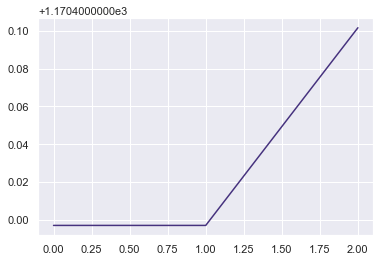

In [108]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

# Meeting homeostatic objective

In [76]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1
# df1

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,1,0,0,0,0,0,0,2,1,0,...,-1,0,0,0,0,0,0,0,0,1
1,-6,-2,31,-1,0,10,331,-31,31,-131,...,54,0,0,-1,0,0,0,31,15,47
2,13,19,-57,8,-4,-4,22,81,0,76,...,3777,1,4,23,1,-3,5,-133,-44,-49
3,32,18,-44,13,48,-16,5,113,68,40,...,6922,3,7,-34,3,-2,7,102,-65,-48
4,44,85,3,43,38,32,14,155,148,53,...,9583,6,11,8,6,1,9,-6,-71,17


In [77]:
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')


In [80]:
pd.DataFrame(fba['target_homeostatic_dmdt'])

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,-1,0,0,0,0,0,361,-1,0,1,...,-1,0,0,0,0,0,0,32,22,5
2,13,23,-25,9,18,-7,32,91,31,133,...,3779,6,6,7,6,6,6,6,13,-36
3,15,41,41,16,54,3,13,121,143,58,...,6934,16,13,-5,16,20,12,151,67,24
4,3,74,99,23,50,26,11,162,231,18,...,9592,27,20,43,27,36,19,63,147,86


In [81]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
850,MN+2[p],4,36
851,NA+[p],4,19
852,OXYGEN-MOLECULE[p],4,63
853,CA+2[p],4,147


In [82]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
# df3[df3['timestep'] == 900].T
df3

df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])
df3['diff'] = df3['target'] - df3['update']

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target,diff
0,2-3-DIHYDROXYBENZOATE[c],0,0.000000,-inf,-inf
1,2-KETOGLUTARATE[c],0,-inf,-inf,NaN
2,2-PG[c],0,-inf,-inf,NaN
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf,NaN
4,4-AMINO-BUTYRATE[c],0,-inf,-inf,NaN
...,...,...,...,...,...
850,MN+2[p],4,0.000000,1.556303,1.556303
851,NA+[p],4,0.954243,1.278754,0.324511
852,OXYGEN-MOLECULE[p],4,0.778151,1.799341,1.021189
853,CA+2[p],4,1.851258,2.167317,0.316059


In [85]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 3, 4])]

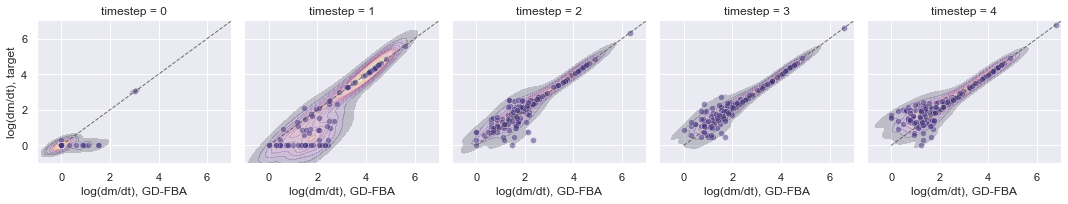

In [86]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

## Outliers?

In [165]:
df4 = df3.loc[df3['timestep'] == 499].reset_index(drop=True)
outliers = list(df4.loc[df4['diff']>0.5, 'index'])

<AxesSubplot:>

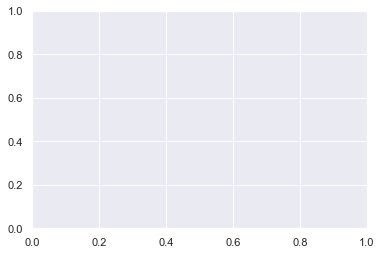

In [166]:
sns.histplot(x='diff', data=df4)

In [167]:
outliers

[]

In [168]:
bulk.loc[:, outliers]

""
0
1
2
3
4
5


Doesn't look like they're going into negative at least. Are they being used?

## Usage

In [169]:
df5 = df3.loc[df3['timestep'] > 200].reset_index(drop=True)
outlier_time = df5[df5['index'].isin(outliers)]

<AxesSubplot:>

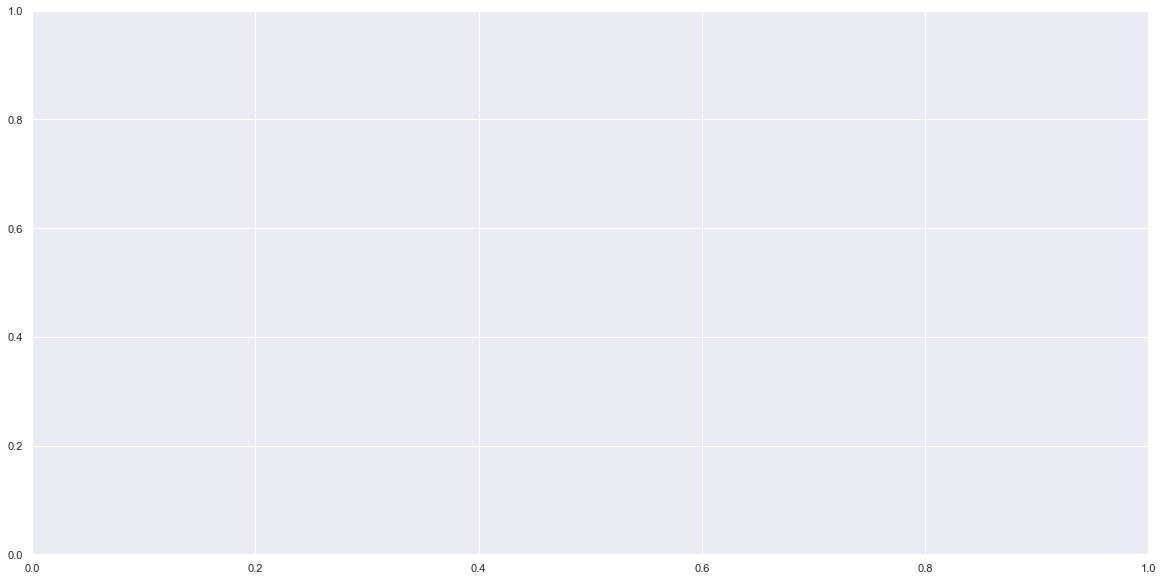

In [170]:
plt.figure(figsize=[20,10])
sns.lineplot(x='timestep', y='diff', hue='index', data=outlier_time, legend=False)

I would guess that they're just not incentivized enough to reach their target completely. 

# Glucose transport

In [87]:
stoichiometry[1]

{'reaction id': '1.1.1.127-RXN',
 'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]': -1,
  'NAD[c]': -1,
  'CPD-343[c]': 1,
  'NADH[c]': 1,
  'PROTON[c]': 1},
 'is reversible': True,
 'enzyme': ['KDUD-MONOMER[c]']}

In [88]:
estimated_fluxes = pd.DataFrame(fba['estimated_fluxes'])
estimated_fluxes

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,-1,0,0,0,0,0,0,0,0,...,2,88911,-226510,137599,0,2,0,0,-1,1971173
1,-13,0,49,15,0,9,0,0,0,1,...,-68,88777,-226176,137466,1,-1,-1,32,54,7128363
2,-1,-2,0,32,217,0,-3,-1,0,1,...,-119,88567,-225710,137260,-194,-2,1,-1,3777,7679641
3,20,-5,9,92,37,-1,-2,-14,1,3,...,-60,88159,-224950,136860,64,13,10,-1,6922,7652301
4,41,48,-8,124,42,-4,-65,-20,-8,7,...,-18,87924,-224536,136643,5,16,-18,6,9583,7633136


In [89]:
for reaction in stoichiometry:
    if 'GLC[p]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

3.2.1.21-RXN-Beta-D-glucosides/WATER//Non-Glucosylated-Glucose-Acceptors/GLC.64.
{'Beta-D-glucosides[p]': -1, 'WATER[p]': -1, 'Non-Glucosylated-Glucose-Acceptors[p]': 1, 'GLC[p]': 1}
[0, -18, 9, -3, -5]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[0, -5, 13, -5, -11]
GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.__GLUCOSE-1-PHOSPHAT-CPLX
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1}
[0, -5, 13, -5, -11]
RXN0-6373-GLC/UBIQUINONE-8//GLC-D-LACTONE/CPD-9956.41.
{'GLC[p]': -1, 'UBIQUINONE-8[i]': -1, 'GLC-D-LACTONE[p]': 1, 'CPD-9956[i]': 1}
[0, -11, -144, 158, 75]
RXN0-6418
{'GLC[p]': -1, 'D-Glucose[p]': 1}
[1, 1, 4, 19, 386]
RXN0-6418-GLC//CPD-15374.15.
{'GLC[p]': -1, 'CPD-15374[p]': 1}
[0, 1, 4, 18, 387]
RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'ALPHA-GLUCOSE[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0]
RXN0-7077-GLC/PROTON//GLC/PROTON.23.
{'GLC[p]':

We should look at the following:

In [203]:
glucose_transport_reactions = ['TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.',
                               'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.',
                               'RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.',
                               'RXN0-7077-GLC/PROTON//GLC/PROTON.23.',
                               'TRANS-RXN0-574-GLC//GLC.9.',
                               'TRANS-RXN0-574-GLC//Glucopyranose.19.']

In [204]:
for reaction in stoichiometry:
    if reaction['reaction id'] in glucose_transport_reactions:
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'ALPHA-GLUCOSE[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0]
RXN0-7077-GLC/PROTON//GLC/PROTON.23.
{'GLC[p]': -1, 'PROTON[p]': -1, 'GLC[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0]
RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.
{'GLC[p]': -1, 'PROTON[p]': -1, 'Glucopyranose[c]': 1, 'PROTON[c]': 1}
[0, 0, 0, 0, 0]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'ALPHA-GLC-6-P[c]': 1, 'PTSH-MONOMER[c]': 1}
[364962, 704917, 704894, 705011, 705171]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'D-glucopyranose-6-phosphate[c]': 1, 'PTSH-MONOMER[c]': 1}
[13335, 488516, 642792, 672367, 705172]
TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.
{'PTSH-PHOSPHORYLATED[c]': -1, 'GLC[p]': -1, 'GLC-6-P[c]': 1, 'PTSH-MONOMER[c]': 1}
[599702, 704846, 704895, 705011, 705171]


# How much glucose is being used?

In [205]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])
influx = fluxes.loc[:,glucose_transport_reactions]
influx

,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.,RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.,RXN0-7077-GLC/PROTON//Glucopyranose/PROTON.33.,RXN0-7077-GLC/PROTON//GLC/PROTON.23.,TRANS-RXN0-574-GLC//GLC.9.,TRANS-RXN0-574-GLC//Glucopyranose.19.
0,364962,13335,599702,0,0,0,0,0
1,704917,488516,704846,0,0,0,0,0
2,704894,642792,704895,0,0,0,0,0
3,705011,672367,705011,0,0,0,0,0
4,705171,705172,705171,0,0,0,0,0


In [206]:
influx.sum(axis=1)

0     977999
1    1898279
2    2052581
3    2082389
4    2115514
dtype: int64

In [207]:
exchanges = pd.DataFrame(fba['estimated_exchange_dmdt'])
exchanges['GLC[p]']

0    -978020
1   -1898310
2   -2052632
3   -2082478
4   -2115320
Name: GLC[p], dtype: int64

Looks like that's all of it.

## What's the flux coming from Glc[p]?

In [188]:
sol_fluxes = pd.DataFrame(fba['solution_fluxes'])
sol_fluxes.loc[:,glucose_transport_reactions]

,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.,TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.,RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.,TRANS-RXN0-574-GLC//GLC.9.,TRANS-RXN0-574-GLC//Glucopyranose.19.
0,0.127023,0.166654,0.137787,0.096819,-1.187428e-12,1.700002e-12
1,0.443980,0.492491,0.452757,0.030854,8.878109e-08,8.213257e-08
2,0.490055,0.545359,0.502474,0.017886,-4.801261e-09,-3.815861e-09
3,0.511017,0.550001,0.524830,0.012895,1.289670e-08,1.253219e-08
4,0.530710,0.550040,0.546246,0.006830,6.217321e-08,7.245056e-08


In [37]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,-3,0,0,-12,-13,-7,-2,2,...,-66,-48016,52877,-4805,0,-10,12,9,-1,1971173
1,37,0,-6,70,0,-9,0,0,0,1,...,0,-48055,52811,-4755,0,0,17,0,46,7128364
2,24,-1,-1,74,15,-1,-12,-2,0,1,...,0,-48059,52815,-4756,2,0,2,0,3876,7679656
3,40,0,0,85,-1,0,-2,-1,0,1,...,0,-48068,52824,-4757,1,-1,0,0,6986,7652314
4,46,0,0,90,14,-1,0,0,0,1,...,0,-48078,52836,-4758,0,0,1,0,9603,7633146


# Hmm

In [236]:
for reaction in stoichiometry:
    if 'CPD-564[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

ADENOSYLHOMOCYSTEINE-NUCLEOSIDASE-RXN
{'ADENOSYL-HOMO-CYS[c]': -1, 'WATER[c]': -1, 'CPD-564[c]': 1, 'ADENINE[c]': 1}
[0, -44, -34, -45, 2]
RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[547866, 532346, 540767, 550069, 554167]
TRANS-RXN0-265-CPD-564//CPD-564.17.
{'CPD-564[c]': -1, 'CPD-564[p]': 1}
[0, 0, 0, 0, 0]


In [237]:
for reaction in stoichiometry:
    if 'DIHYDROXYPENTANEDIONE[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RIBOSYLHOMOCYSTEINASE-RXN
{'CPD-564[c]': -1, 'HOMO-CYS[c]': 1, 'DIHYDROXYPENTANEDIONE[c]': 1}
[547866, 532346, 540767, 550069, 554167]
RXN-10015
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10773[c]': 1}
[107790, -29, -6, -6, 0]
RXN-10016
{'DIHYDROXYPENTANEDIONE[c]': -1, 'CPD-10775[c]': 1}
[0, -6, -6, -5, 0]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[440076, 532391, 540773, 550072, 554167]


In [238]:
for reaction in stoichiometry:
    if 'CPD-10551[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[440076, 532461, 540837, 550159, 554259]
RXN0-5461
{'DIHYDROXYPENTANEDIONE[c]': -1, 'ATP[c]': -1, 'CPD-10551[c]': 1, 'ADP[c]': 1, 'PROTON[c]': 1}
[440076, 532391, 540773, 550072, 554167]


In [239]:
for reaction in stoichiometry:
    if 'CPD0-2467[c]' in reaction['stoichiometry'].keys():
        print(reaction['reaction id'], reaction['stoichiometry'],  fba['estimated_fluxes'][reaction['reaction id']][0:],sep='\n')

RXN-15216
{'CPD-10551[c]': -1, 'CPD0-2467[c]': 1}
[440076, 532461, 540837, 550159, 554259]
RXN-15943 (reverse)
{'DIHYDROXY-ACETONE-PHOSPHATE[c]': 1, 'ACETYL-COA[c]': 1, 'CPD0-2467[c]': -1, 'CO-A[c]': -1}
[440076, 532595, 541011, 550384, 554442]
RXN0-6720
{'CPD0-2467[c]': -1, 'WATER[c]': -1, 'CPD0-2468[c]': 1}
[0, -68, -109, -139, -92]


## Get top fluxes

In [38]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

KeyError: 49

In [39]:
df3[df3['index'].isin(top_fluxes)]

NameError: name 'top_fluxes' is not defined

# Check target goal

In [40]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173, 7128364, 7679656, 7652314, 7633146]